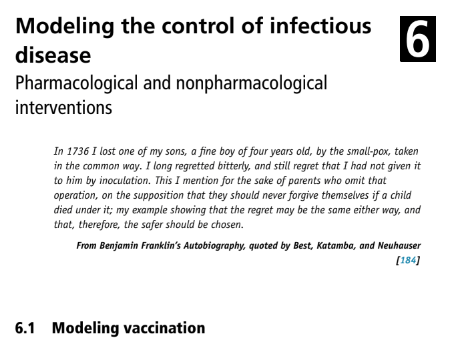

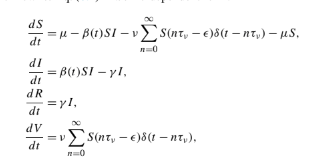

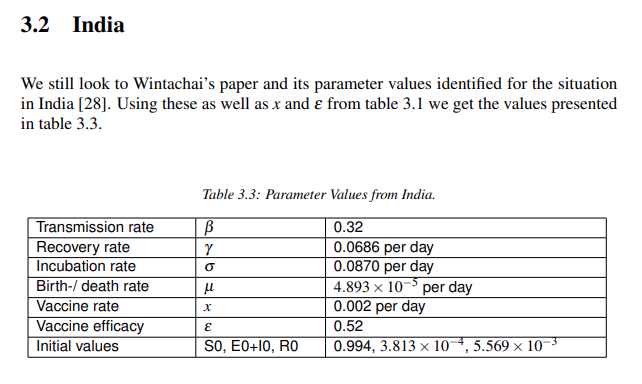
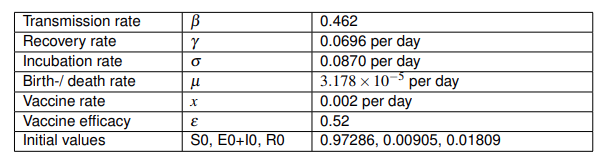

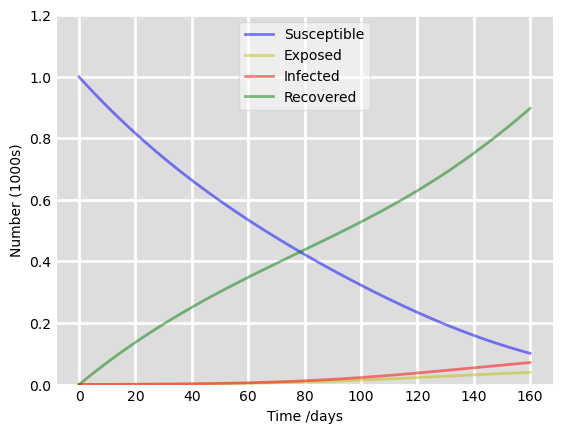

In [5]:
# Import necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SEIR model differential equations.
def deriv(y, t, N, beta, gamma, delta, rho, vacc_eff):
    S, E, I, R = y
    # Change in S population over time
    dSdt = -beta * S * I / N - rho * S
    # Change in E population over time
    dEdt = (beta * S * I / N) * (1 - vacc_eff)
    # Change in I population over time
    dIdt = delta * E - gamma * I
    # Change in R population over time
    dRdt = gamma * I + rho * S * vacc_eff
    return dSdt, dEdt, dIdt, dRdt

# Total population, N.
N = 1000
# Initial number of infected, recovered, and exposed individuals, I0, R0, E0.
I0, R0, E0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - E0
# Initial conditions vector
y0 = S0, E0, I0, R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# Incubation rate, delta
delta = 1./5
# Vaccination rate, rho
rho = 0.01
# Vaccine efficacy
vacc_eff = 0.75
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, rho, vacc_eff))
S, E, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(True, which='major', color='w', linewidth=2, linestyle='-')


legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


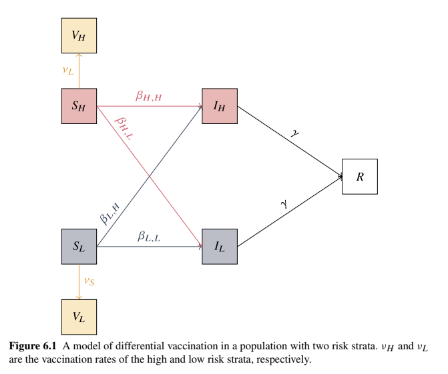

https://github.com/logiclink/corona_seir_workbench

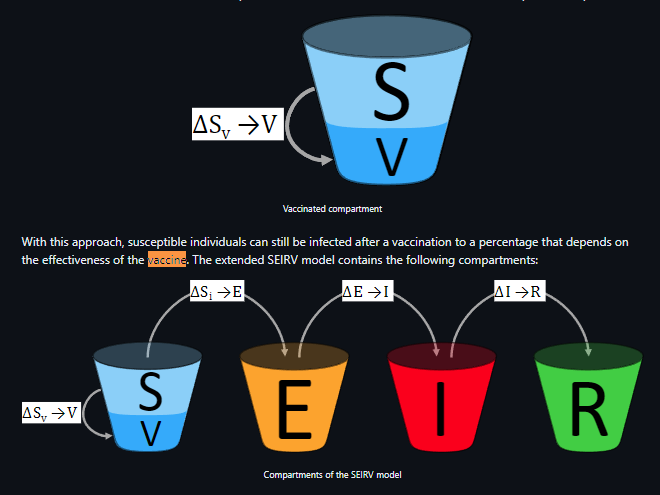